In [1]:
import numpy as np
import pandas as pd
import astropy.io.fits as fits
import os
import sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt

Read the fits event file

In [2]:
hdul = fits.open("scorefile_test.fits")
hdul.info()

events = hdul[1].data
#print(events.columns)

t_ID = events['EventID']
t_ED = events['En_dep']
t_SI = events['Scint_ID']
t_XP = events['X_Primary']
t_YP = events['Y_Primary']
t_ZP = events['Z_Primary']
t_TP = events['Theta_Primary']
t_PP = events['Phi_Primary']
t_EP = events['En_Primary']
t_Dx = events['X_Detected']
t_Dy = events['Y_Detected']
t_Dz = events['Z_Detected']

Filename: scorefile_test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  EVENTS        1 BinTableHDU     43   28920R x 12C   [1K, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   


Create a pandas data frame

In [42]:
data = {'EventID': t_ID, 'En_dep': t_ED, 'Scint_ID': t_SI, 'X_Primary': t_XP, 'Y_Primary': t_YP, 'Z_Primary': t_ZP,
        'Theta_Primary': t_TP, 'Phi_Primary': t_PP, 'En_Primary': t_EP, 'X_Detected': t_Dx,
       'Y_Detected': t_Dy, 'Z_Detected': t_Dz}
df = pd.DataFrame(data)
df

,EventID,En_dep,Scint_ID,X_Primary,Y_Primary,Z_Primary,Theta_Primary,Phi_Primary,En_Primary,X_Detected,Y_Detected,Z_Detected
0,4,5.056252,119,-4.132852,3.552836,-8.0,180.0,0.0,60.0,-38.239151,33.041008,-32.883976
1,11,2.477170,121,-3.526051,-1.702573,-8.0,180.0,0.0,60.0,-23.639153,33.041008,-32.883976
2,31,16.710003,110,-5.447607,2.930470,-8.0,180.0,0.0,60.0,-52.989151,29.191009,-32.883976
3,32,6.967762,117,0.565933,3.307095,-8.0,180.0,0.0,60.0,5.560848,33.041008,-32.883976
4,33,10.179645,43,-1.022850,1.248501,-8.0,180.0,0.0,60.0,-10.564152,12.966008,-32.883976
...,...,...,...,...,...,...,...,...,...,...,...,...
28915,119980,0.539443,125,0.296321,-2.690902,-8.0,180.0,0.0,60.0,1.960848,-29.358992,-32.883976
28916,119987,9.390171,112,-5.543942,1.449417,-8.0,180.0,0.0,60.0,-52.989151,14.591008,-32.883976
28917,119993,5.986904,108,0.721955,-1.616525,-8.0,180.0,0.0,60.0,9.410848,-18.208992,-32.883976
28918,119995,15.710589,32,-3.005780,-1.814966,-8.0,180.0,0.0,60.0,-32.964151,-18.083993,-32.883976


Create the lookup table (Scint_ID, X_detected, Y_detected, Z_detected)

In [41]:
Scint_ID = []
X_Detected = []
Y_Detected = []
Z_Detected = []
for i in range(64):
    Scint_ID.append(int(df[df['Scint_ID'] == i+1].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Z_Detected'])
for i in range(100,132):
    #print(i)
    Scint_ID.append(int(df[df['Scint_ID'] == i+1].iloc[0,:]['Scint_ID']))
    X_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['X_Detected'])
    Y_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Y_Detected'])
    Z_Detected.append(df[df['Scint_ID'] == i+1].iloc[0,:]['Z_Detected'])

# create the data frame
data = {'Scint_ID': Scint_ID, 'X_Detected': X_Detected, 'Y_Detected': Y_Detected,
       'Z_Detected': Z_Detected}
look_up_table = pd.DataFrame(data)
# Save the lookup table as a csv file
look_up_table.to_csv("lookup_table.csv")
look_up_table
#print(look_up_table.iloc[63:,:])

,Scint_ID,X_Detected,Y_Detected,Z_Detected
0,1,-1.914152,-18.083993,-32.883976
1,2,-14.964152,-5.033992,-32.883976
2,3,-14.964152,-9.383992,-32.883976
3,4,-14.964152,-13.733992,-32.883976
4,5,-14.964152,-18.083993,-32.883976
...,...,...,...,...
91,128,-34.539151,-29.358992,-32.883976
92,129,-27.239153,-29.358992,-32.883976
93,130,-19.939152,-29.358992,-32.883976
94,131,-12.639153,-29.358992,-32.883976


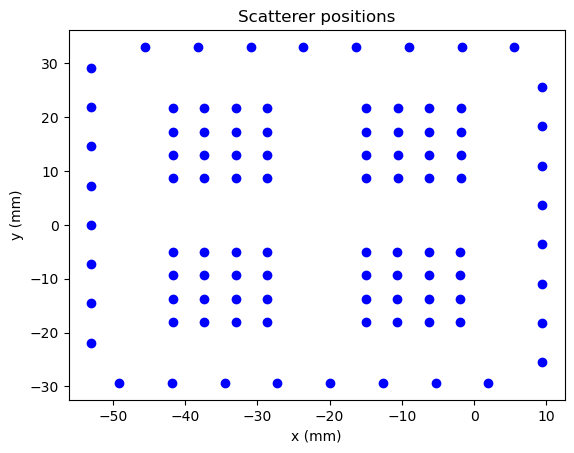

In [37]:
position_x = []
position_y = []
for i in range(len(look_up_table)):
    position_x.append(look_up_table.iloc[i,1])
    position_y.append(look_up_table.iloc[i,2])

plt.title('Scatterer positions')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')    
plt.plot(position_x, position_y, 'o', color='blue');